In [79]:
#%matplotlib inline
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact
import ipywidgets as widgets

In [80]:
# let's create two x variables that are quite similar
x = np.vstack([[1, 1, 0, 1, 0], [1, 0.1, 0, 1, 0]])
y = np.array([1, 1, 0, 1, 0]) + 0.1*np.random.randn(5)

In [83]:
x.shape, y.shape

((2, 5), (5,))

In [84]:
# we have to transpose x using x.T so that the first dimension matches y
x.T.shape

(5, 2)

In [86]:
# this is x
x

array([[1. , 1. , 0. , 1. , 0. ],
       [1. , 0.1, 0. , 1. , 0. ]])

In [85]:
# this is its transpose, x.T
# the first column of x.T was the first row of x, and so on
x.T

array([[1. , 1. ],
       [1. , 0.1],
       [0. , 0. ],
       [1. , 1. ],
       [0. , 0. ]])

<IPython.core.display.Javascript object>


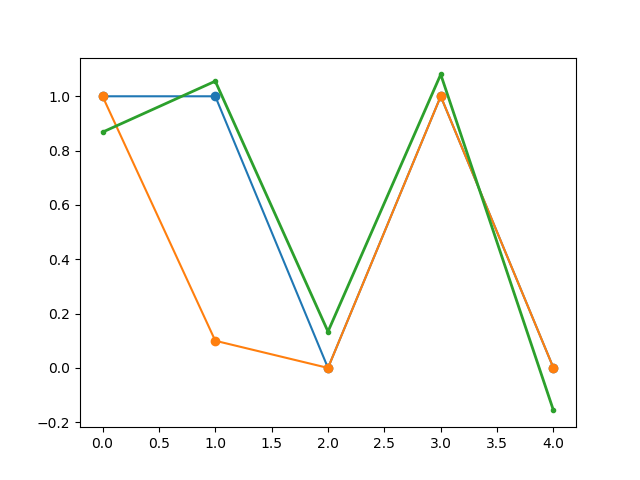

In [82]:
# let's plot our two predictors
plt.plot(x[0], 'o-')
plt.plot(x[1], 'o-')
# and the output variable, y
plt.plot(y, '.-', lw=2)

In [87]:
# now let's run linear regression on this thing
# it returns 4 values
beta, res, rank, sing = np.linalg.lstsq(x.T, y)
print(beta) # these are the weights
print(res) # these are the residuals (squared error after fitting)
print(rank) # the rank (how many non-dependent variables in x)
print(sing) # and the singular values (tell us about stability)

[ 1.06472417 -0.09042826]
[0.06495434]
2
[2.15929403 0.58944831]


/Users/huth/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [88]:
# what happens if we create 10 COMPLETELY RANDOM x variables, and use those to predict...
x_random = np.random.randn(10,10)
# 10 completely random data points. this couldn't possibly work?
y_random = np.random.randn(10)

# but oh, yes, it does!
beta, res, rank, sing = np.linalg.lstsq(x_random, y_random)

# compute R^2 as 1 - (residual sum of squares / total sum of squares)
R2 = 1 - ((y_random - x_random.dot(beta))**2).sum() / (y_random**2).sum()
print(R2)
# holy moly it's 1.0 this model is perfect

1.0


/Users/huth/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [131]:
# another example of "perfect" prediction
# here we use a 10x10 identity matrix as the predictors
# so each weight (each beta) will learn the exact value of one of the output (y) variables
x_random = np.eye(10)
y_random = np.random.randn(10)

beta, res, rank, sing = np.linalg.lstsq(x_random, y_random)

R2 = 1 - ((y_random - x_random.dot(beta))**2).sum() / (y_random**2).sum()
print(R2)

1.0


/Users/huth/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


In [132]:
print(list(zip(beta, y_random))) 
# yep they are the same. that's why the model is perfect. it just copied y!

[(-0.5171199801412932, -0.5171199801412932), (-0.7631994151507929, -0.7631994151507929), (-1.4192062494063797, -1.4192062494063797), (0.4086243497519836, 0.4086243497519836), (-0.7133921098351246, -0.7133921098351246), (0.16837297894608844, 0.16837297894608844), (0.6958589998598198, 0.6958589998598198), (0.3669611735423008, 0.3669611735423008), (-0.7575946013389183, -0.7575946013389183), (-0.8015874620446924, -0.8015874620446924)]


In [100]:
# how can we fix this?
# we can split our dataset into two parts: training and test
x_random = np.random.randn(10,10)
y_random = np.random.randn(10)

# this is the training part
x_trn = x_random[:7]
y_trn = y_random[:7]

# and the test part
x_test = x_random[7:]
y_test = y_random[7:]

# fit the regression on the training part
beta, res, rank, sing = np.linalg.lstsq(x_trn, y_trn)

# and test it on the test part
R2 = 1 - ((y_test - x_test.dot(beta))**2).sum() / (y_test**2).sum()
print(R2) # no longer 1.0!

-26.01160337301453


/Users/huth/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


In [134]:
# what if x_1 and x_2 are *extremely* similar?
# play with the 0.99 here, make it closer to 1 to make the regression more unstable
# or further from 1 to make the regression more stable
x = np.vstack([[1, 1, 0, 1, 0], [1, 0.99, 0, 1, 0]])
y = np.array([1, 1, 0, 1, 0]) + 0.01*np.random.randn(5)

beta, res, rank, sing = np.linalg.lstsq(x.T, y)
print(beta)
print(sing)
print(sing[0] / sing[1])

[0.49827776 0.50049401]
[2.44541746 0.00578312]
422.85456133806366


/Users/huth/anaconda3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
